REGRESSION

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df = pd.read_csv(r"C:\Users\esrak\Downloads\teen_phone_addiction_dataset.csv")

#Categorical encoding
df = df.drop(columns=['Name'])
cat_cols = ['Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop('Addiction_Level', axis=1)
y = df['Addiction_Level']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

#Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

min_addiction = y_train.min()
max_addiction = y_train.max()
y_pred_lr = np.clip(y_pred_lr, min_addiction, max_addiction)

#Evaluation
for name, preds in [('Linear Regression', y_pred_lr), ('Random Forest', y_pred_rf)]:
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"--- {name} ---")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}\n")

--- Linear Regression ---
MAE: 1.103
RMSE: 1.340
R²: 0.287

--- Random Forest ---
MAE: 0.374
RMSE: 0.586
R²: 0.864



In [130]:
output = pd.DataFrame({
    "Actual": y_test,
    "Predicted_RF": y_pred_rf,
    "Predicted_LR": y_pred_lr
})
output.to_csv("Addiction_Predictions.csv", index=False)

Actual and Linear Regression

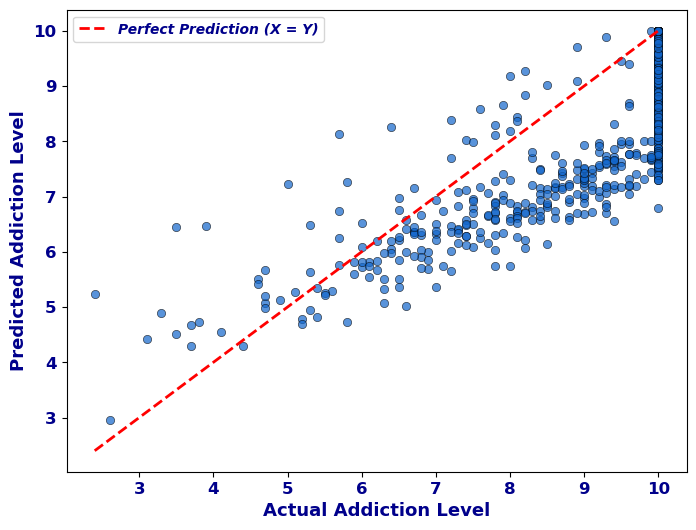

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))


sns.scatterplot(x=y_test, y=y_pred_lr, color="#1266CBFF", alpha=0.7,edgecolor='black')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Prediction (X = Y)")

leg = plt.legend()

for text in leg.get_texts():
    text.set_color("darkblue")
    text.set_fontweight("bold")
    text.set_style("italic")

plt.xlabel("Actual Addiction Level",fontsize=13, fontweight='bold',color='darkblue')
plt.ylabel("Predicted Addiction Level",fontsize=13, fontweight='bold',color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')

plt.show()

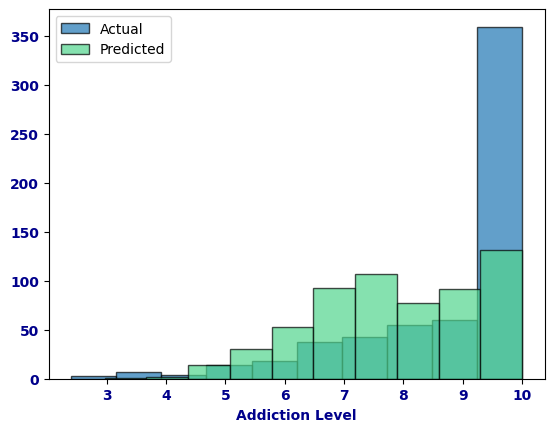

In [168]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=10, alpha=0.7, label='Actual', color='#1f77b4', edgecolor='black')
plt.hist(y_pred_lr, bins=10, alpha=0.7, label='Predicted', color="#51d58d", edgecolor='black')
plt.legend()
plt.xlabel("Addiction Level",fontweight='bold', color='darkblue')
plt.ylabel("")
plt.xticks(fontsize=10, fontweight='bold', color='darkblue')
plt.yticks(fontsize=10, fontweight='bold', color='darkblue')
plt.show()


Actual and Random Forest Prediction

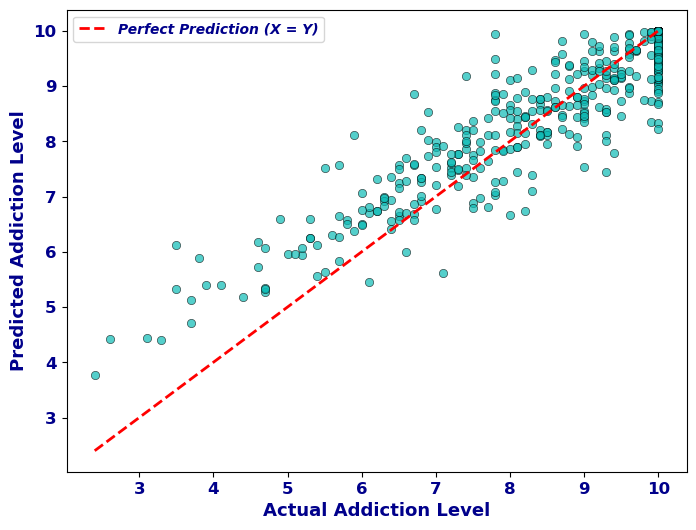

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))


sns.scatterplot(x=y_test, y=y_pred_rf, color="#0DBBB5FF", alpha=0.7,edgecolor='black')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Prediction (X = Y)")

leg = plt.legend()

for text in leg.get_texts():
    text.set_color("darkblue")
    text.set_fontweight("bold")
    text.set_style("italic")

plt.xlabel("Actual Addiction Level",fontsize=13, fontweight='bold',color='darkblue')
plt.ylabel("Predicted Addiction Level",fontsize=13, fontweight='bold',color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')

plt.show()

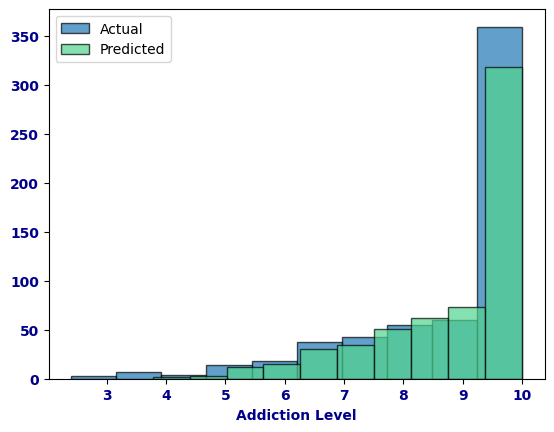

In [166]:
import matplotlib.pyplot as plt

#plt.hist(y_test, bins=10, alpha=0.5, label='Actual')
#plt.hist(y_pred_rf, bins=10, alpha=0.5, label='Predicted')
plt.hist(y_test, bins=10, alpha=0.7, label='Actual', color='#1f77b4', edgecolor='black')
plt.hist(y_pred_rf, bins=10, alpha=0.7, label='Predicted', color="#51d58d", edgecolor='black')
plt.legend()
plt.xlabel("Addiction Level",fontweight='bold', color='darkblue')
plt.ylabel("")
plt.xticks(fontsize=10, fontweight='bold', color='darkblue')
plt.yticks(fontsize=10, fontweight='bold', color='darkblue')
plt.show()

Feature Importance (Random Forest)

C:\Users\esrak\AppData\Local\Temp\ipykernel_7764\276284379.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')


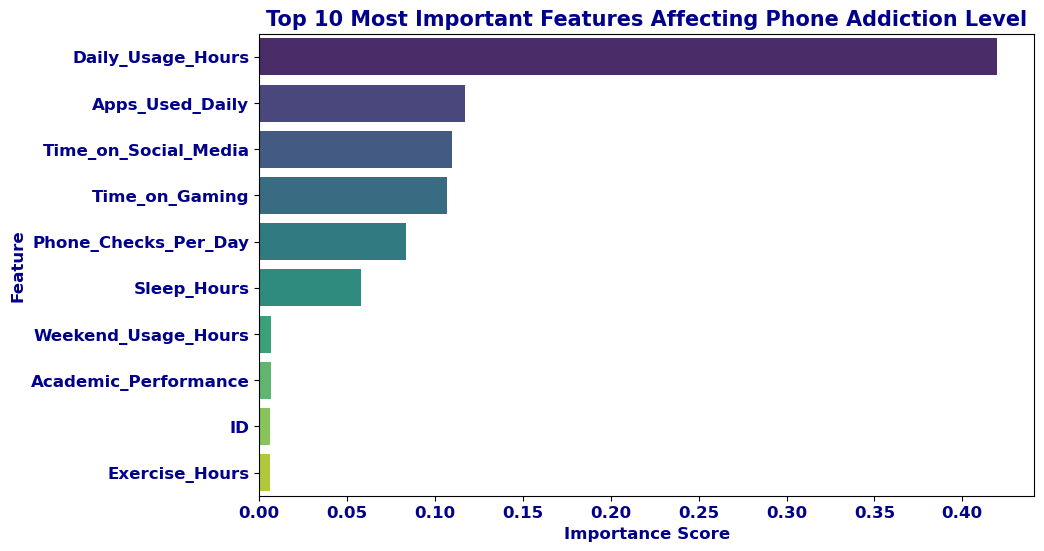

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#X = X.drop(columns=['ID'])
#rf.fit(X, y)

importances = rf.feature_importances_
features = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')
plt.title("Top 10 Most Important Features Affecting Phone Addiction Level",fontsize=15, fontweight='bold', color='darkblue')
plt.xlabel("Importance Score",fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Feature",fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.show()

Clustering

In [149]:
features1 = [
    "Daily_Usage_Hours",
    "Sleep_Hours",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Time_on_Education",
    "Academic_Performance",
    "Anxiety_Level",
    "Self_Esteem",
    "Depression_Level",
    "Parental_Control"
]

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


X = df[features1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

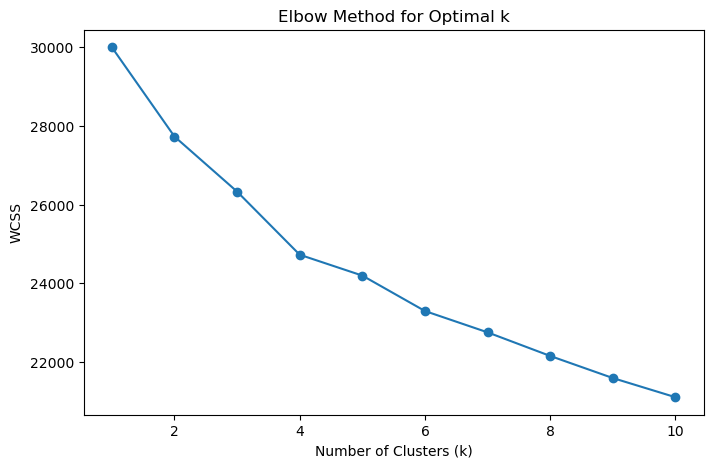

In [151]:
wcss = []   # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [152]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [153]:
cluster_summary = df.groupby("Cluster")[features1 + ["Addiction_Level"]].mean()
cluster_summary

,Daily_Usage_Hours,Sleep_Hours,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Academic_Performance,Anxiety_Level,Self_Esteem,Depression_Level,Parental_Control,Addiction_Level
Cluster,,,,,,,,,,,
0,4.982327,6.239165,2.622291,1.431439,0.964298,73.848135,2.685613,5.556838,5.103020,0.501776,8.921403
1,4.235431,6.012081,2.744365,1.562741,1.149848,81.029442,7.723858,5.544162,4.534010,0.425381,8.762030
2,5.939258,7.336445,2.071766,1.602587,0.934308,69.600675,6.904387,5.535433,6.939258,0.605174,8.964679


In [126]:
cluster_summary.to_csv("Cluster_Summary.csv", index=True)

C:\Users\esrak\AppData\Local\Temp\ipykernel_7764\3838714775.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Addiction_Level', data=df, palette='viridis')


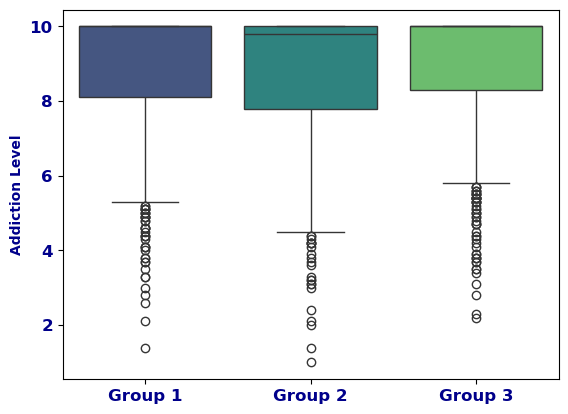

In [127]:
sns.boxplot(x='Cluster', y='Addiction_Level', data=df, palette='viridis')
#plt.title("Addiction Level by Groups")
plt.xticks([0,1,2], ['Group 1','Group 2','Group 3'],fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("", fontsize=10,fontweight='bold', color='darkblue')
plt.ylabel("Addiction Level", fontsize=10,fontweight='bold', color='darkblue')
plt.show()

C:\Users\esrak\AppData\Local\Temp\ipykernel_7764\587172357.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Parental_Control', data=df, palette="viridis")


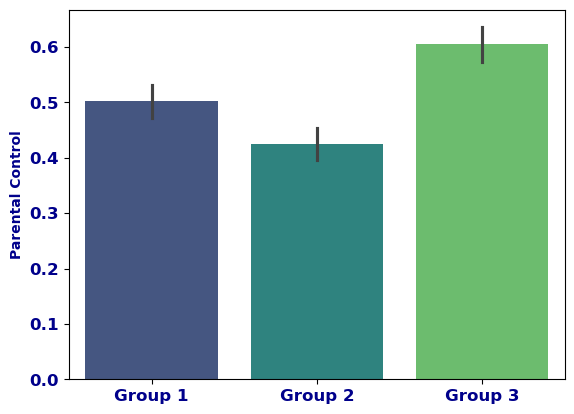

In [128]:
sns.barplot(x='Cluster', y='Parental_Control', data=df, palette="viridis")
#plt.title("Average Parental Control per Groups")
plt.xticks([0,1,2], ['Group 1','Group 2','Group 3'],fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("", fontsize=10,fontweight='bold', color='darkblue')
plt.ylabel("Parental Control", fontsize=10,fontweight='bold', color='darkblue')
plt.show()


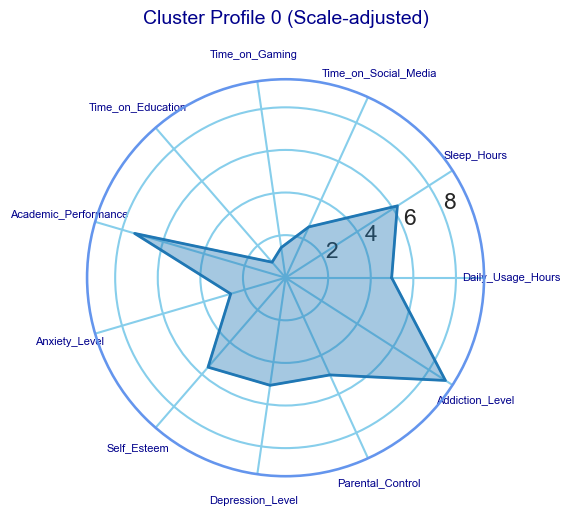

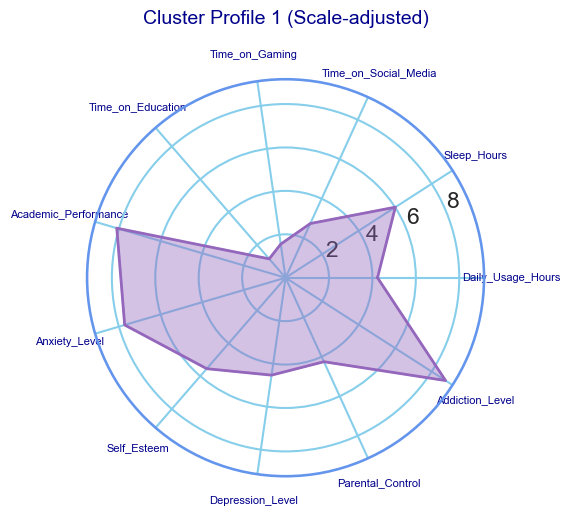

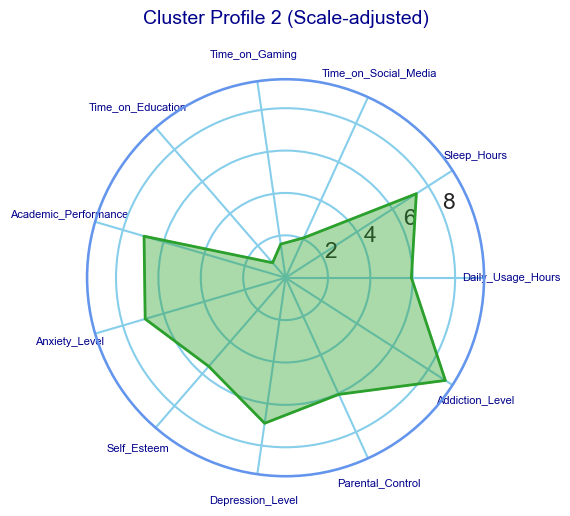

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


cluster_summary_scaled = cluster_summary.copy() 


cluster_summary_scaled["Academic_Performance"] /= 10
cluster_summary_scaled["Parental_Control"] *= 10 


labels = cluster_summary_scaled.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors = ['tab:blue', 'tab:purple', 'tab:green']


for i, row in cluster_summary_scaled.iterrows():
    values = row.tolist()
    values += values[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    color = colors[i % len(colors)]
    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.4)
    ax.spines['polar'].set_color('cornflowerblue')            
    ax.grid(color='skyblue', linestyle='-')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8,color='darkblue')
    ax.set_title(f"Cluster Profile {i} (Scale-adjusted)", size=14, pad=40, color='darkblue')
    plt.tight_layout()
    plt.show()